In [65]:
from steam_profile_games import obtener_juegos_steam
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn import metrics
# Ignoramos warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
API_KEY = '5EF8885FBA34D73C53DD4AF7564C44C7'

# URL del perfil de Steam
perfil_url = 'https://steamcommunity.com/id/MetalMaxALIZ/'

# Obtener el DataFrame con todos los juegos
df_juegos_propios = obtener_juegos_steam(perfil_url, API_KEY)

# Mostrar información
print(f"Total de juegos: {len(df_juegos_propios)}")
df_juegos_propios.head(10)

Total de juegos: 473


,app_id,nombre,tiempo_juego_minutos,img_icon_url,tiempo_windows_minutos,tiempo_mac_minutos,tiempo_linux_minutos,playtime_deck_forever,rtime_last_played,content_descriptorids,playtime_disconnected,has_community_visible_stats,has_leaderboards,tiempo_2semanas_minutos,tiempo_juego_horas,imagen_url,store_url
0,10,Counter-Strike,7707,https://media.steampowered.com/steamcommunity/...,0,0,0,0,1475882850,"[2, 5]",0,NaN,NaN,NaN,128.450000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/10
1,30,Day of Defeat,5,https://media.steampowered.com/steamcommunity/...,0,0,0,0,86400,"[2, 5]",0,NaN,NaN,NaN,0.083333,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/30
2,40,Deathmatch Classic,20,https://media.steampowered.com/steamcommunity/...,0,0,0,0,86400,NaN,0,NaN,NaN,NaN,0.333333,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/40
3,60,Ricochet,6,https://media.steampowered.com/steamcommunity/...,0,0,0,0,86400,NaN,0,NaN,NaN,NaN,0.100000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/60
4,80,Counter-Strike: Condition Zero,102,https://media.steampowered.com/steamcommunity/...,0,0,0,0,86400,"[2, 5]",0,NaN,NaN,NaN,1.700000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/80
5,100,Counter-Strike: Condition Zero Deleted Scenes,0,https://media.steampowered.com/steamcommunity/...,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0.000000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/100
6,550,Left 4 Dead 2,507,https://media.steampowered.com/steamcommunity/...,0,0,0,0,1422303949,"[2, 5]",0,True,NaN,NaN,8.450000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/550
7,570,Dota 2,2553,https://media.steampowered.com/steamcommunity/...,37,0,0,0,1664845515,[5],0,NaN,NaN,NaN,42.550000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/570
8,620,Portal 2,376,https://media.steampowered.com/steamcommunity/...,0,0,0,0,1498957512,NaN,0,True,True,NaN,6.266667,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/620
9,730,Counter-Strike 2,37285,https://media.steampowered.com/steamcommunity/...,9663,0,0,0,1704987692,"[2, 5]",0,True,NaN,NaN,621.416667,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/730


In [4]:
# Nos quedamos solo con las columnas de interés 
columnas_interes = ['app_id', 'nombre', 'tiempo_juego_horas', 'imagen_url', 'store_url']
df_juegos_propios_filtrado = df_juegos_propios[columnas_interes]
df_juegos_propios_filtrado.shape


(473, 5)

In [5]:
df_juegos_propios_filtrado.head(10)

,app_id,nombre,tiempo_juego_horas,imagen_url,store_url
0,10,Counter-Strike,128.450000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/10
1,30,Day of Defeat,0.083333,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/30
2,40,Deathmatch Classic,0.333333,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/40
3,60,Ricochet,0.100000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/60
4,80,Counter-Strike: Condition Zero,1.700000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/80
5,100,Counter-Strike: Condition Zero Deleted Scenes,0.000000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/100
6,550,Left 4 Dead 2,8.450000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/550
7,570,Dota 2,42.550000,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/570
8,620,Portal 2,6.266667,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/620
9,730,Counter-Strike 2,621.416667,https://cdn.cloudflare.steamstatic.com/steam/a...,https://store.steampowered.com/app/730


In [6]:
# Eliminamos los que tengan el mismo nombre
df_juegos_propios_filtrado = df_juegos_propios_filtrado.drop_duplicates(subset=['nombre'])

In [7]:
# Convertimos df_juegos_propios_filtrado a un diccionario para facilitar la búsqueda
juegos_dict = df_juegos_propios_filtrado.set_index('nombre').T.to_dict('index')
juegos_dict

{'app_id': {'Counter-Strike': 10,
  'Day of Defeat': 30,
  'Deathmatch Classic': 40,
  'Ricochet': 60,
  'Counter-Strike: Condition Zero': 80,
  'Counter-Strike: Condition Zero Deleted Scenes': 100,
  'Left 4 Dead 2': 550,
  'Dota 2': 570,
  'Portal 2': 620,
  'Counter-Strike 2': 730,
  'Psychonauts': 3830,
  "Sid Meier's Civilization IV": 3900,
  "Sid Meier's Civilization III: Complete": 3910,
  "Sid Meier's Pirates!": 3920,
  "Sid Meier's Civilization IV: Warlords": 3990,
  "Garry's Mod": 4000,
  'Condemned: Criminal Origins': 4720,
  'Natural Selection 2': 4920,
  'Hitman 2: Silent Assassin': 6850,
  'Hitman: Codename 47': 6900,
  'X-Blades': 7510,
  'Two Worlds II HD': 7520,
  'Two Worlds II Castle Defense': 7530,
  "Sid Meier's Railroads!": 7600,
  'BioShock': 7670,
  'Kane & Lynch: Dead Men': 8080,
  'Just Cause 2': 8190,
  "Sid Meier's Civilization IV: Beyond the Sword": 8800,
  "Sid Meier's Civilization V": 8930,
  'Saints Row 2': 9480,
  'Overlord': 11450,
  'Overlord: Raising

------------------------------------

------------------------------------

In [8]:
# Crear un dataframe de juegos_rawg.db
from rawg_api_scraper_reintentos import obtener_dataframe_juegos
df_rawg = obtener_dataframe_juegos()
df_rawg

,id,name,background_image,metacritic,steam_store_id,genres,tags,fecha_extraccion
0,1,D/Generation HD,https://media.rawg.io/media/screenshots/5c4/5c...,NaN,19827,"Adventure, Puzzle","Singleplayer, Steam Achievements, Full control...",2025-11-25 14:05:45
1,2,Extreme Exorcism,https://media.rawg.io/media/screenshots/67d/67...,75.0,18705,"Action, Adventure, Casual, Indie","Singleplayer, Steam Achievements, Multiplayer,...",2025-11-25 13:59:13
2,3,Toto Temple Deluxe,https://media.rawg.io/media/screenshots/0af/0a...,NaN,23421,"Action, Casual, Indie","Singleplayer, Steam Achievements, Multiplayer,...",2025-11-25 14:06:44
3,4,Penarium,https://media.rawg.io/media/screenshots/68b/68...,80.0,19765,"Action, Arcade, Casual, Indie","Singleplayer, Steam Achievements, Full control...",2025-11-25 13:58:02
4,5,Standpoint,https://media.rawg.io/media/screenshots/238/23...,NaN,25258,"Action, Indie","Singleplayer, Steam Achievements, Full control...",2025-11-25 14:16:44
...,...,...,...,...,...,...,...,...
99068,1015265,Loutra: Inaugural Group Show,https://media.rawg.io/media/screenshots/c42/c4...,NaN,1017113,"RPG, Simulation, Casual, Indie","Singleplayer, Steam Achievements, Atmospheric,...",2025-11-25 15:38:02
99069,1015266,プレイすると死ぬゲーム,https://media.rawg.io/media/screenshots/4b6/4b...,NaN,1017114,Indie,"Singleplayer, 2D, Horror, 3D, Walking Simulato...",2025-11-25 15:38:02
99070,1015267,Stay in the rhythm,https://media.rawg.io/media/screenshots/9fd/9f...,NaN,1017115,"Action, Indie","Singleplayer, Steam Achievements, Steam Cloud,...",2025-11-25 15:38:02
99071,1015268,Mazebreach,https://media.rawg.io/media/screenshots/919/91...,NaN,1017116,Action,"Singleplayer, Stealth, Survival Horror, VR, Fa...",2025-11-25 15:38:02


In [9]:
df_rawg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99073 entries, 0 to 99072
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                99073 non-null  int64  
 1   name              99073 non-null  object 
 2   background_image  99012 non-null  object 
 3   metacritic        4348 non-null   float64
 4   steam_store_id    99073 non-null  int64  
 5   genres            98607 non-null  object 
 6   tags              98444 non-null  object 
 7   fecha_extraccion  99073 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.0+ MB


In [10]:
# Eliminamos las columnas que no nos interesan
df_rawg = df_rawg.drop(columns=['fecha_extraccion', 'id', 'tags', 'metacritic', 'steam_store_id' ])

In [11]:
df_rawg

,name,background_image,genres
0,D/Generation HD,https://media.rawg.io/media/screenshots/5c4/5c...,"Adventure, Puzzle"
1,Extreme Exorcism,https://media.rawg.io/media/screenshots/67d/67...,"Action, Adventure, Casual, Indie"
2,Toto Temple Deluxe,https://media.rawg.io/media/screenshots/0af/0a...,"Action, Casual, Indie"
3,Penarium,https://media.rawg.io/media/screenshots/68b/68...,"Action, Arcade, Casual, Indie"
4,Standpoint,https://media.rawg.io/media/screenshots/238/23...,"Action, Indie"
...,...,...,...
99068,Loutra: Inaugural Group Show,https://media.rawg.io/media/screenshots/c42/c4...,"RPG, Simulation, Casual, Indie"
99069,プレイすると死ぬゲーム,https://media.rawg.io/media/screenshots/4b6/4b...,Indie
99070,Stay in the rhythm,https://media.rawg.io/media/screenshots/9fd/9f...,"Action, Indie"
99071,Mazebreach,https://media.rawg.io/media/screenshots/919/91...,Action


------------------------------------

------------------------------------

In [12]:
# Creamos un dataframe de steam_data.db
from SteamSpy import obtener_dataframe_steam_data
df_steam_spy = obtener_dataframe_steam_data()
df_steam_spy

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
0,730,Counter-Strike: Global Offensive,Valve,Valve,,7642084,1173003,0,"100,000,000 .. 200,000,000",33076,731,6137,295,0,0,0,1013936
1,1172470,Apex Legends,Respawn,Electronic Arts,,668053,326926,0,"100,000,000 .. 200,000,000",10632,622,962,250,0,0,0,124262
2,578080,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",,1520457,1037487,0,"100,000,000 .. 200,000,000",23472,855,6057,316,0,0,0,314682
3,1623730,Palworld,Pocketpair,Pocketpair,,358266,22443,0,"50,000,000 .. 100,000,000",3799,689,2202,219,2999,2999,0,18028
4,440,Team Fortress 2,Valve,Valve,,1044264,117208,0,"50,000,000 .. 100,000,000",23714,330,4326,89,0,0,0,43819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86536,2571600,Meurtre Au Florian,"Nikoballz, PnDAa",Nikoballz,,7,2,0,"0 .. 20,000",0,0,0,0,499,499,0,0
86537,3223680,Rescue Girl Operation: Code X,2024-NGame,2024-NGame,,1,1,0,"0 .. 20,000",0,0,0,0,399,399,0,0
86538,3310110,Big Burger Tower,Frozen Logic Studios,Frozen Logic Studios,,2,1,0,"0 .. 20,000",0,0,0,0,399,399,0,0
86539,1589920,Long Ago: A Puzzle Tale,GrimTalin,GrimTalin,,15,2,0,"0 .. 20,000",0,0,0,0,499,499,0,0


In [34]:
df_steam_spy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86541 entries, 0 to 86540
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   appid            86541 non-null  object
 1   name             86541 non-null  object
 2   developer        86541 non-null  object
 3   publisher        86541 non-null  object
 4   score_rank       86541 non-null  object
 5   positive         86541 non-null  object
 6   negative         86541 non-null  object
 7   userscore        86541 non-null  object
 8   owners           86541 non-null  object
 9   average_forever  86541 non-null  object
 10  average_2weeks   86541 non-null  object
 11  median_forever   86541 non-null  object
 12  median_2weeks    86541 non-null  object
 13  price            86541 non-null  object
 14  initialprice     86541 non-null  object
 15  discount         86541 non-null  object
 16  ccu              86541 non-null  object
dtypes: object(17)
memory usage: 11.

In [13]:
# Nos quedamos solo con las columnas de interés 
columnas_interes_steam_spy = ['appid','name','positive','negative', 'owners']
df_steam_spy_interes = df_steam_spy[columnas_interes_steam_spy]
df_steam_spy_interes

,appid,name,positive,negative,owners
0,730,Counter-Strike: Global Offensive,7642084,1173003,"100,000,000 .. 200,000,000"
1,1172470,Apex Legends,668053,326926,"100,000,000 .. 200,000,000"
2,578080,PUBG: BATTLEGROUNDS,1520457,1037487,"100,000,000 .. 200,000,000"
3,1623730,Palworld,358266,22443,"50,000,000 .. 100,000,000"
4,440,Team Fortress 2,1044264,117208,"50,000,000 .. 100,000,000"
...,...,...,...,...,...
86536,2571600,Meurtre Au Florian,7,2,"0 .. 20,000"
86537,3223680,Rescue Girl Operation: Code X,1,1,"0 .. 20,000"
86538,3310110,Big Burger Tower,2,1,"0 .. 20,000"
86539,1589920,Long Ago: A Puzzle Tale,15,2,"0 .. 20,000"


In [14]:
# Reemplazamos los las filas que contengan el string None de la columna price por NaN
#import numpy as np
#df_steam_spy_interes['price'] = df_steam_spy_interes['price'].replace('None', np.nan)
#df_steam_spy_interes['initialprice'] = df_steam_spy_interes['initialprice'].replace('None', np.nan)
#df_steam_spy_interes.shape

In [15]:
# Borramos las filas con precios nulos ya que son muy pocas
#df_steam_spy_interes = df_steam_spy_interes.dropna(subset=['price', 'initialprice'])
#df_steam_spy_interes.shape

------------------------------------

------------------------------------

In [16]:
# combinar los dataset df_steam_spy y df_rawg_filtrado usando la columna name
df_combinado = pd.merge(df_steam_spy_interes, df_rawg, left_on='name', right_on='name', how='inner')
df_combinado.shape

(62015, 7)

In [17]:
df_combinado

,appid,name,positive,negative,owners,background_image,genres
0,730,Counter-Strike: Global Offensive,7642084,1173003,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/736/73619bd3...,Shooter
1,1172470,Apex Legends,668053,326926,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/737/737ea566...,"Action, Shooter"
2,1623730,Palworld,358266,22443,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/4e9/4e9c9514...,"Action, Adventure, RPG, Indie"
3,440,Team Fortress 2,1044264,117208,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/46d/46d98e69...,"Action, Shooter"
4,1938090,Call of Duty: Modern Warfare II,419594,294520,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/1af/1af8edc7...,"Action, Shooter"
...,...,...,...,...,...,...,...
62010,2571600,Meurtre Au Florian,7,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/9bb/9b...,"Adventure, Indie"
62011,3223680,Rescue Girl Operation: Code X,1,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/ccd/cc...,Adventure
62012,3310110,Big Burger Tower,2,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/8f1/8f...,"Simulation, Casual"
62013,1589920,Long Ago: A Puzzle Tale,15,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/73e/73...,Indie


In [18]:
# Cambiamos la columna 'price' y 'initialprice' a tipo int y las cambiamos a euros

#df_combinado['price'] = df_combinado['price'].astype(int) / 100
#df_combinado['initialprice'] = df_combinado['initialprice'].astype(int) / 100

#df_combinado['discount'] = df_combinado['discount'].astype(int)

In [35]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62015 entries, 0 to 62014
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   appid             62015 non-null  object
 1   name              62015 non-null  object
 2   positive          62015 non-null  object
 3   negative          62015 non-null  object
 4   owners            62015 non-null  object
 5   background_image  62007 non-null  object
 6   genres            61761 non-null  object
dtypes: object(7)
memory usage: 3.3+ MB


In [20]:
# Hacemos one hot encoding de la columna 'genres' del dataframe df_combinado
df_combinado_generos = pd.get_dummies(df_combinado['genres'].str.split(', ').explode()).groupby(level=0).sum()
df_combinado_final = pd.concat([df_combinado, df_combinado_generos], axis=1)
df_combinado_final

,appid,name,positive,negative,owners,background_image,genres,Action,Adventure,Arcade,...,Indie,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
0,730,Counter-Strike: Global Offensive,7642084,1173003,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/736/73619bd3...,Shooter,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1172470,Apex Legends,668053,326926,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/737/737ea566...,"Action, Shooter",1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1623730,Palworld,358266,22443,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/4e9/4e9c9514...,"Action, Adventure, RPG, Indie",1,1,0,...,1,0,0,0,1,0,0,0,0,0
3,440,Team Fortress 2,1044264,117208,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/46d/46d98e69...,"Action, Shooter",1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1938090,Call of Duty: Modern Warfare II,419594,294520,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/1af/1af8edc7...,"Action, Shooter",1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62010,2571600,Meurtre Au Florian,7,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/9bb/9b...,"Adventure, Indie",0,1,0,...,1,0,0,0,0,0,0,0,0,0
62011,3223680,Rescue Girl Operation: Code X,1,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/ccd/cc...,Adventure,0,1,0,...,0,0,0,0,0,0,0,0,0,0
62012,3310110,Big Burger Tower,2,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/8f1/8f...,"Simulation, Casual",0,0,0,...,0,0,0,0,0,0,0,1,0,0
62013,1589920,Long Ago: A Puzzle Tale,15,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/73e/73...,Indie,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
# Sacamos un porcentaje de votos positivos en base a las columnas positive y negative y los dejamos con dos decimales
df_combinado_final['porcentaje_votos_positivos'] = (df_combinado_final['positive'].astype(float) / (df_combinado_final['positive'].astype(float) + df_combinado_final['negative'].astype(float)) * 100).round(2)
df_combinado_final

,appid,name,positive,negative,owners,background_image,genres,Action,Adventure,Arcade,...,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy,porcentaje_votos_positivos
0,730,Counter-Strike: Global Offensive,7642084,1173003,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/736/73619bd3...,Shooter,0,0,0,...,0,0,0,0,0,1,0,0,0,86.69
1,1172470,Apex Legends,668053,326926,"100,000,000 .. 200,000,000",https://media.rawg.io/media/games/737/737ea566...,"Action, Shooter",1,0,0,...,0,0,0,0,0,1,0,0,0,67.14
2,1623730,Palworld,358266,22443,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/4e9/4e9c9514...,"Action, Adventure, RPG, Indie",1,1,0,...,0,0,0,1,0,0,0,0,0,94.10
3,440,Team Fortress 2,1044264,117208,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/46d/46d98e69...,"Action, Shooter",1,0,0,...,0,0,0,0,0,1,0,0,0,89.91
4,1938090,Call of Duty: Modern Warfare II,419594,294520,"50,000,000 .. 100,000,000",https://media.rawg.io/media/games/1af/1af8edc7...,"Action, Shooter",1,0,0,...,0,0,0,0,0,1,0,0,0,58.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62010,2571600,Meurtre Au Florian,7,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/9bb/9b...,"Adventure, Indie",0,1,0,...,0,0,0,0,0,0,0,0,0,77.78
62011,3223680,Rescue Girl Operation: Code X,1,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/ccd/cc...,Adventure,0,1,0,...,0,0,0,0,0,0,0,0,0,50.00
62012,3310110,Big Burger Tower,2,1,"0 .. 20,000",https://media.rawg.io/media/screenshots/8f1/8f...,"Simulation, Casual",0,0,0,...,0,0,0,0,0,0,1,0,0,66.67
62013,1589920,Long Ago: A Puzzle Tale,15,2,"0 .. 20,000",https://media.rawg.io/media/screenshots/73e/73...,Indie,0,0,0,...,0,0,0,0,0,0,0,0,0,88.24


In [22]:
# Cambiamos los datos de la columna 'owners' para que en vez de un rango de personas que tienen el juego, tengamos un valor numérico que sea la media del rango. Por ejemplo si el campo contiene '500,000 .. 1,000,000' lo cambiariamos a 750000
def calcular_media_owners(rango):
    partes = rango.split(' .. ')
    if len(partes) == 2:
        min_owners = int(partes[0].replace(',', ''))
        max_owners = int(partes[1].replace(',', ''))
        return (min_owners + max_owners) // 2
    return np.nan
df_combinado_final['owners'] = df_combinado_final['owners'].apply(calcular_media_owners)
df_combinado_final



,appid,name,positive,negative,owners,background_image,genres,Action,Adventure,Arcade,...,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy,porcentaje_votos_positivos
0,730,Counter-Strike: Global Offensive,7642084,1173003,150000000,https://media.rawg.io/media/games/736/73619bd3...,Shooter,0,0,0,...,0,0,0,0,0,1,0,0,0,86.69
1,1172470,Apex Legends,668053,326926,150000000,https://media.rawg.io/media/games/737/737ea566...,"Action, Shooter",1,0,0,...,0,0,0,0,0,1,0,0,0,67.14
2,1623730,Palworld,358266,22443,75000000,https://media.rawg.io/media/games/4e9/4e9c9514...,"Action, Adventure, RPG, Indie",1,1,0,...,0,0,0,1,0,0,0,0,0,94.10
3,440,Team Fortress 2,1044264,117208,75000000,https://media.rawg.io/media/games/46d/46d98e69...,"Action, Shooter",1,0,0,...,0,0,0,0,0,1,0,0,0,89.91
4,1938090,Call of Duty: Modern Warfare II,419594,294520,75000000,https://media.rawg.io/media/games/1af/1af8edc7...,"Action, Shooter",1,0,0,...,0,0,0,0,0,1,0,0,0,58.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62010,2571600,Meurtre Au Florian,7,2,10000,https://media.rawg.io/media/screenshots/9bb/9b...,"Adventure, Indie",0,1,0,...,0,0,0,0,0,0,0,0,0,77.78
62011,3223680,Rescue Girl Operation: Code X,1,1,10000,https://media.rawg.io/media/screenshots/ccd/cc...,Adventure,0,1,0,...,0,0,0,0,0,0,0,0,0,50.00
62012,3310110,Big Burger Tower,2,1,10000,https://media.rawg.io/media/screenshots/8f1/8f...,"Simulation, Casual",0,0,0,...,0,0,0,0,0,0,1,0,0,66.67
62013,1589920,Long Ago: A Puzzle Tale,15,2,10000,https://media.rawg.io/media/screenshots/73e/73...,Indie,0,0,0,...,0,0,0,0,0,0,0,0,0,88.24


In [36]:
df_combinado_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62015 entries, 0 to 62014
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   appid                       62015 non-null  object 
 1   name                        62015 non-null  object 
 2   positive                    62015 non-null  object 
 3   negative                    62015 non-null  object 
 4   owners                      62015 non-null  int64  
 5   background_image            62007 non-null  object 
 6   genres                      61761 non-null  object 
 7   Action                      62015 non-null  int64  
 8   Adventure                   62015 non-null  int64  
 9   Arcade                      62015 non-null  int64  
 10  Board Games                 62015 non-null  int64  
 11  Card                        62015 non-null  int64  
 12  Casual                      62015 non-null  int64  
 13  Educational                 620

In [24]:
# Seleccionar las columnas para el modelo KNN
columnas_modelo = ['owners', 'Action', 'Adventure', 'Arcade', 'Board Games', 'Card',
                   'Casual', 'Educational', 'Family', 'Fighting', 'Indie',
                   'Massively Multiplayer', 'Platformer', 'Puzzle', 'RPG', 'Racing',
                   'Shooter', 'Simulation', 'Sports', 'Strategy', 'porcentaje_votos_positivos']

# Crear DataFrame solo con las columnas del modelo
df_modelo = df_combinado_final[columnas_modelo].copy()

# Eliminar filas con valores nulos
df_modelo = df_modelo.dropna()

print(f"Datos para el modelo: {df_modelo.shape}")
print(f"\nPrimeras filas:")
df_modelo.head()

Datos para el modelo: (61703, 21)

Primeras filas:


,owners,Action,Adventure,Arcade,Board Games,Card,Casual,Educational,Family,Fighting,...,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy,porcentaje_votos_positivos
0,150000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,86.69
1,150000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,67.14
2,75000000,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,94.10
3,75000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,89.91
4,75000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,58.76


In [25]:
df_modelo.columns

Index(['owners', 'Action', 'Adventure', 'Arcade', 'Board Games', 'Card',
       'Casual', 'Educational', 'Family', 'Fighting', 'Indie',
       'Massively Multiplayer', 'Platformer', 'Puzzle', 'RPG', 'Racing',
       'Shooter', 'Simulation', 'Sports', 'Strategy',
       'porcentaje_votos_positivos'],
      dtype='object')

In [37]:
# Normalizar owners y porcentaje_votos_positivos para KNN (importante porque usa distancias)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_cols = ['owners', 'porcentaje_votos_positivos']
df_modelo[numeric_cols] = scaler.fit_transform(df_modelo[numeric_cols])
df_modelo




,owners,Action,Adventure,Arcade,Board Games,Card,Casual,Educational,Family,Fighting,...,Massively Multiplayer,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy,porcentaje_votos_positivos
0,98.788484,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.447047
1,98.788484,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-0.410252
2,49.347525,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.771987
3,49.347525,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.588249
4,49.347525,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-0.777729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62010,-0.086842,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.056329
62011,-0.086842,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.161869
62012,-0.086842,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.430862
62013,-0.086842,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.515017


Datos normalizados: (61703, 21)

Media de cada feature (debe ser ~0): [-2.21098172e-17  0.00000000e+00 -1.84248477e-18 -4.79046040e-17
  1.65823629e-17]
Desviación estándar (debe ser ~1): [1. 1. 1. 1. 1.]


In [45]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61703 entries, 0 to 62014
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   owners                      61703 non-null  float64
 1   Action                      61703 non-null  int64  
 2   Adventure                   61703 non-null  int64  
 3   Arcade                      61703 non-null  int64  
 4   Board Games                 61703 non-null  int64  
 5   Card                        61703 non-null  int64  
 6   Casual                      61703 non-null  int64  
 7   Educational                 61703 non-null  int64  
 8   Family                      61703 non-null  int64  
 9   Fighting                    61703 non-null  int64  
 10  Indie                       61703 non-null  int64  
 11  Massively Multiplayer       61703 non-null  int64  
 12  Platformer                  61703 non-null  int64  
 13  Puzzle                      61703 no

In [38]:
# Crear el modelo KNN

# Usar k=10 como valor inicial
k_optimo = 10
knn_modelo = NearestNeighbors(n_neighbors=k_optimo, metric='cosine')
knn_modelo.fit(df_modelo)

print(f"\n✓ Modelo KNN entrenado con k={k_optimo}")
print(f"Total de juegos en el modelo: {len(df_modelo)}")


✓ Modelo KNN entrenado con k=10
Total de juegos en el modelo: 61703


In [63]:

# Función para recomendar juegos similares basándose en juegos del diccionario juegos_dict
def recomendar_juegos(nombres_juegos, n_recomendaciones=10):
    """
        nombres_juegos: Nombre del juego o lista de nombres de juegos del diccionario juegos_dict
        n_recomendaciones: Número de juegos similares a recomendar
        
    """

    # Convertir a lista si es un solo nombre
    if isinstance(nombres_juegos, str):
        nombres_juegos = [nombres_juegos]
    
    # Obtener los índices de los juegos en df_combinado_final
    indices_juegos = []
    for nombre in nombres_juegos:
        if nombre in juegos_dict['app_id']:
            app_id = juegos_dict['app_id'][nombre]
            # Buscar el índice en df_combinado_final
            mask = df_combinado_final['appid'] == str(app_id)
            if mask.any():
                idx = df_combinado_final[mask].index[0]
                # Verificar si ese índice está en df_modelo
                if idx in df_modelo.index:
                    indice_en_modelo = df_modelo.index.get_loc(idx)
                    indices_juegos.append(indice_en_modelo)
                    
                else:
                    print(f"✗ El juego '{nombre}' no está en el modelo")
            else:
                print(f"✗ El juego '{nombre}' no está en df_combinado_final")
        else:
            print(f"✗ El juego '{nombre}' no está en juegos_dict")
    
    if len(indices_juegos) == 0:
        print("\nNo se encontraron juegos válidos para hacer recomendaciones.")
        return None
    
    
    # Obtener los vectores de los juegos como DataFrame para mantener nombres de columnas
    juegos_vectores = df_modelo.iloc[indices_juegos]
    
    # Calcular el centroide (promedio) de todos los juegos
    centroide = juegos_vectores.mean(axis=0).values.reshape(1, -1)
    
    # Encontrar los vecinos más cercanos al centroide
    distancias, indices = knn_modelo.kneighbors(centroide, n_neighbors=n_recomendaciones + len(indices_juegos)) # n_recomendaciones + len(indices_juegos)
    
    # Excluir los juegos de entrada de las recomendaciones
    indices_recomendados = []
    distancias_recomendadas = []
    
    for i, idx in enumerate(indices[0]):
        # Excluir si es uno de los juegos de entrada
        if idx not in indices_juegos:
            indices_recomendados.append(idx)
            distancias_recomendadas.append(distancias[0][i])
        
        # Detenerse cuando tengamos suficientes recomendaciones
        if len(indices_recomendados) == n_recomendaciones:
            break
    
    indices_originales = df_modelo.index[indices_recomendados].tolist()
    
    # Obtener información de los juegos recomendados
    juegos_recomendados = df_combinado_final.loc[indices_originales][['appid', 'name', 'genres', 'owners', 'porcentaje_votos_positivos']].copy()
    sorted_distancias = sorted(distancias_recomendadas)
    similitudes = []
    for d in distancias_recomendadas:
        # Percentil inverso: distancia baja = percentil alto
        percentil = (len([x for x in sorted_distancias if x > d]) / len(sorted_distancias)) * 100
        similitudes.append(percentil)
    
    juegos_recomendados['similitud'] = [round(s, 1) for s in similitudes]

    return juegos_recomendados



In [66]:
# Prueba 
print("Recomendaciones basadas en 'Counter-Strike' y 'Left 4 Dead 2':\n")
recomendaciones = recomendar_juegos(["Counter-Strike","Left 4 Dead 2","Mind Over Magic","Don't Starve","Terraria", "Stardew Valley"], n_recomendaciones=10)
recomendaciones

Recomendaciones basadas en 'Counter-Strike' y 'Left 4 Dead 2':



,appid,name,genres,owners,porcentaje_votos_positivos,similitud
30,340,Half-Life 2: Lost Coast,Action,35000000,89.25,90.0
2,1623730,Palworld,"Action, Adventure, RPG, Indie",75000000,94.10,80.0
7,304930,Unturned,"Action, Shooter",75000000,91.20,70.0
3,440,Team Fortress 2,"Action, Shooter",75000000,89.91,60.0
27,218620,PAYDAY 2,"Action, Shooter",35000000,89.63,50.0
5,2358720,Black Myth: Wukong,"Action, Adventure, RPG",75000000,96.66,40.0
35,292030,The Witcher 3: Wild Hunt,"Action, RPG",35000000,96.13,30.0
19,359550,Tom Clancy's Rainbow Six Siege,"Action, Shooter",35000000,83.86,20.0
24,242760,The Forest,"Action, Adventure, Indie",35000000,95.54,10.0
33,990080,Hogwarts Legacy,"Action, RPG",35000000,90.22,0.0


In [ ]:
# IGNORAR EN LA MEMORIA
scaler = StandardScaler()
df_modelo_normalizado = scaler.fit_transform(df_modelo)

print(f"Datos normalizados: {df_modelo_normalizado.shape}")
print(f"\nMedia de cada feature (debe ser ~0): {df_modelo_normalizado.mean(axis=0)[:5]}")
print(f"Desviación estándar (debe ser ~1): {df_modelo_normalizado.std(axis=0)[:5]}")

Datos normalizados: (61703, 21)

Media de cada feature (debe ser ~0): [-2.21098172e-17  0.00000000e+00 -1.84248477e-18 -4.79046040e-17
  1.65823629e-17]
Desviación estándar (debe ser ~1): [1. 1. 1. 1. 1.]


# Exportar Modelo para el Frontend

Ejecuta la siguiente celda para exportar todos los datos necesarios para el sistema de recomendaciones en la aplicación web.

In [67]:
# Exportar modelo para el backend del frontend
import pickle
import os

# Crear directorio data si no existe
data_path = './data'
os.makedirs(data_path, exist_ok=True)

print("Exportando modelo y datos...")
print("="*70)

# Guardar DataFrames
df_combinado_final.to_pickle(os.path.join(data_path, 'df_combinado_final.pkl'))
print(" df_combinado_final guardado")

df_modelo.to_pickle(os.path.join(data_path, 'df_modelo.pkl'))
print(" df_modelo guardado")

# Guardar array normalizado
with open(os.path.join(data_path, 'df_modelo_normalizado.pkl'), 'wb') as f:
    pickle.dump(df_modelo_normalizado, f)
print(" df_modelo_normalizado guardado")

# Guardar modelo KNN
with open(os.path.join(data_path, 'knn_modelo.pkl'), 'wb') as f:
    pickle.dump(knn_modelo, f)
print(" knn_modelo guardado")

# Guardar diccionario de juegos
with open(os.path.join(data_path, 'juegos_dict.pkl'), 'wb') as f:
    pickle.dump(juegos_dict, f)
print(" juegos_dict guardado")

print("="*70)
print("Todos los datos se guardaron correctamente")
print(f"Ubicación: {os.path.abspath(data_path)}")
print("\nAhora puedes ejecutar el backend con: python backend/app.py")
print("Y el frontend con: npm start (desde la carpeta frontend)")

Exportando modelo y datos...
 df_combinado_final guardado
 df_modelo guardado
 df_modelo_normalizado guardado
 knn_modelo guardado
 juegos_dict guardado
Todos los datos se guardaron correctamente
Ubicación: d:\CURSO\Proyecto_con_FrontEnd\Proyecto_con_FrontEnd\notebooks_and_scripts\data

Ahora puedes ejecutar el backend con: python backend/app.py
Y el frontend con: npm start (desde la carpeta frontend)


# 📊 Evaluación del Modelo de Recomendación KNN

A continuación se presentan diferentes métricas y visualizaciones para evaluar la calidad del sistema de recomendación basado en K-Nearest Neighbors.

## 1. Calidad de Recomendaciones: Similitud Promedio

Mide qué tan similares son los juegos recomendados entre sí para diferentes valores de k.

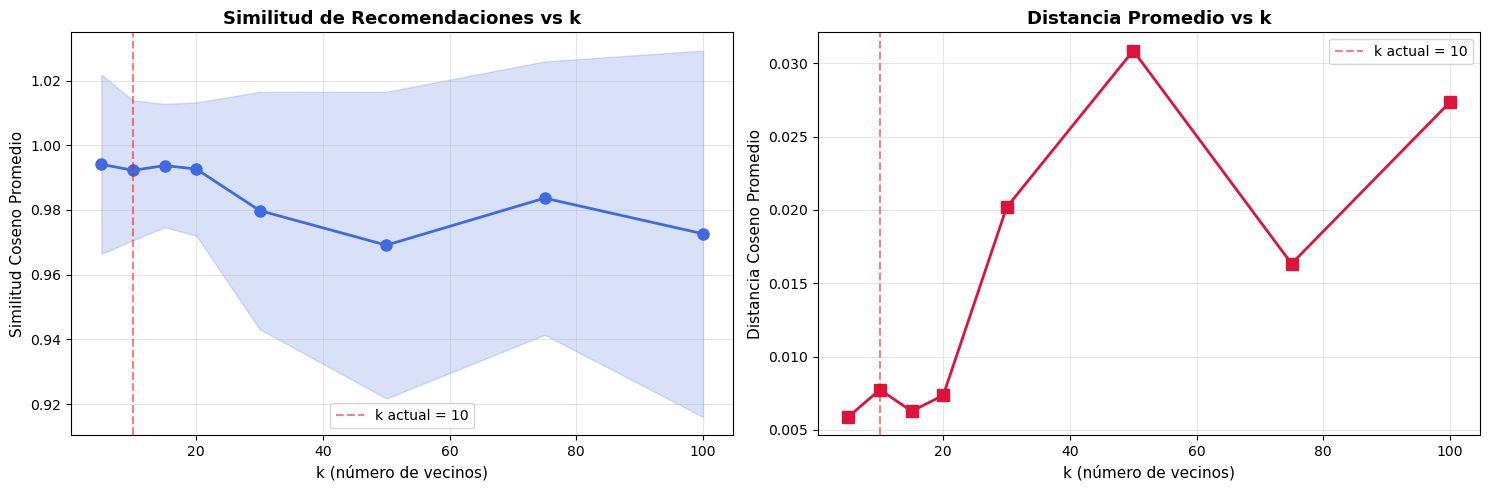


📊 Análisis de k óptimo:
  • k con mayor similitud promedio: 5
  • Similitud en k=5: 0.9941
  • Similitud en k=10 (actual): 0.9923


In [68]:
# Evaluar diferentes valores de k
from sklearn.metrics.pairwise import cosine_similarity

k_valores = [5, 10, 15, 20, 30, 50, 75, 100]
n_pruebas = 50  # Número de juegos aleatorios para probar

resultados_k = []

for k in k_valores:
    knn_temp = NearestNeighbors(n_neighbors=k, metric='cosine')
    knn_temp.fit(df_modelo)
    
    similitudes_promedio = []
    distancias_promedio = []
    
    # Seleccionar juegos aleatorios
    indices_test = np.random.choice(len(df_modelo), size=n_pruebas, replace=False)
    
    for idx in indices_test:
        distancias, indices_vecinos = knn_temp.kneighbors([df_modelo.iloc[idx]], n_neighbors=k)
        
        # Similitud promedio (1 - distancia coseno)
        similitud = 1 - distancias[0][1:].mean()  # Excluir el juego mismo
        similitudes_promedio.append(similitud)
        distancias_promedio.append(distancias[0][1:].mean())
    
    resultados_k.append({
        'k': k,
        'similitud_media': np.mean(similitudes_promedio),
        'distancia_media': np.mean(distancias_promedio),
        'std_similitud': np.std(similitudes_promedio)
    })

# Visualizar resultados
df_resultados = pd.DataFrame(resultados_k)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfica 1: Similitud promedio vs k
axes[0].plot(df_resultados['k'], df_resultados['similitud_media'], marker='o', linewidth=2, markersize=8, color='royalblue')
axes[0].fill_between(df_resultados['k'], 
                       df_resultados['similitud_media'] - df_resultados['std_similitud'],
                       df_resultados['similitud_media'] + df_resultados['std_similitud'],
                       alpha=0.2, color='royalblue')
axes[0].set_xlabel('k (número de vecinos)', fontsize=11)
axes[0].set_ylabel('Similitud Coseno Promedio', fontsize=11)
axes[0].set_title('Similitud de Recomendaciones vs k', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(10, color='red', linestyle='--', alpha=0.5, label='k actual = 10')
axes[0].legend()

# Gráfica 2: Distancia promedio vs k
axes[1].plot(df_resultados['k'], df_resultados['distancia_media'], marker='s', linewidth=2, markersize=8, color='crimson')
axes[1].set_xlabel('k (número de vecinos)', fontsize=11)
axes[1].set_ylabel('Distancia Coseno Promedio', fontsize=11)
axes[1].set_title('Distancia Promedio vs k', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(10, color='red', linestyle='--', alpha=0.5, label='k actual = 10')
axes[1].legend()

plt.tight_layout()
plt.show()

# Mostrar mejor k
mejor_k_idx = df_resultados['similitud_media'].idxmax()
print(f"\n📊 Análisis de k óptimo:")
print(f"  • k con mayor similitud promedio: {df_resultados.loc[mejor_k_idx, 'k']}")
print(f"  • Similitud en k={df_resultados.loc[mejor_k_idx, 'k']}: {df_resultados.loc[mejor_k_idx, 'similitud_media']:.4f}")
print(f"  • Similitud en k=10 (actual): {df_resultados[df_resultados['k'] == 10]['similitud_media'].values[0]:.4f}")

## 2. Diversidad de Recomendaciones

Evalúa cuánta variedad hay en las recomendaciones (distintos géneros, popularidades).

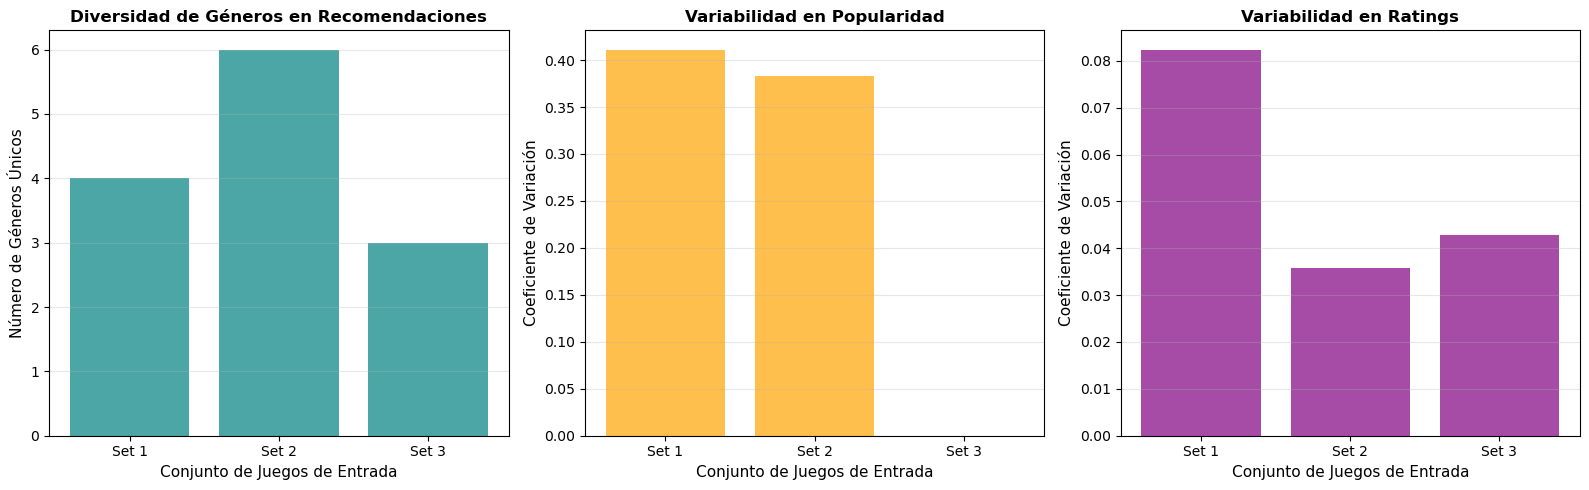


📊 Métricas de Diversidad:

  Set 1: Counter-Strike, Left 4 Dead 2
    • Géneros únicos: 4
    • Variabilidad popularidad: 0.411
    • Variabilidad ratings: 0.082

  Set 2: Terraria, Stardew Valley
    • Géneros únicos: 6
    • Variabilidad popularidad: 0.383
    • Variabilidad ratings: 0.036

  Set 3: Don't Starve, Mind Over Magic
    • Géneros únicos: 3
    • Variabilidad popularidad: 0.000
    • Variabilidad ratings: 0.043


In [69]:
# Evaluar diversidad de recomendaciones
def calcular_diversidad(recomendaciones_df):
    """Calcula la diversidad en géneros y popularidad de las recomendaciones"""
    # Diversidad de géneros (número de géneros únicos en las recomendaciones)
    generos_en_recomendaciones = []
    for genres_str in recomendaciones_df['genres']:
        generos_en_recomendaciones.extend(genres_str.split(', '))
    
    diversidad_generos = len(set(generos_en_recomendaciones))
    
    # Variabilidad en popularidad (coeficiente de variación)
    owners = recomendaciones_df['owners']
    cv_popularidad = (owners.std() / owners.mean()) if owners.mean() > 0 else 0
    
    # Variabilidad en ratings
    ratings = recomendaciones_df['porcentaje_votos_positivos']
    cv_ratings = (ratings.std() / ratings.mean()) if ratings.mean() > 0 else 0
    
    return {
        'diversidad_generos': diversidad_generos,
        'cv_popularidad': cv_popularidad,
        'cv_ratings': cv_ratings
    }

# Probar con varios juegos diferentes
juegos_prueba = [
    ["Counter-Strike", "Left 4 Dead 2"],  # FPS
    ["Terraria", "Stardew Valley"],  # Indie/Casual
    ["Don't Starve", "Mind Over Magic"]  # Survival/Strategy
]

resultados_diversidad = []

for juegos in juegos_prueba:
    recs = recomendar_juegos(juegos, n_recomendaciones=10)
    if recs is not None:
        div = calcular_diversidad(recs)
        div['juegos_input'] = ', '.join(juegos)
        resultados_diversidad.append(div)

df_diversidad = pd.DataFrame(resultados_diversidad)

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Gráfica 1: Diversidad de géneros
axes[0].bar(range(len(df_diversidad)), df_diversidad['diversidad_generos'], color='teal', alpha=0.7)
axes[0].set_xlabel('Conjunto de Juegos de Entrada', fontsize=11)
axes[0].set_ylabel('Número de Géneros Únicos', fontsize=11)
axes[0].set_title('Diversidad de Géneros en Recomendaciones', fontsize=12, fontweight='bold')
axes[0].set_xticks(range(len(df_diversidad)))
axes[0].set_xticklabels([f"Set {i+1}" for i in range(len(df_diversidad))], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Gráfica 2: Variabilidad en popularidad
axes[1].bar(range(len(df_diversidad)), df_diversidad['cv_popularidad'], color='orange', alpha=0.7)
axes[1].set_xlabel('Conjunto de Juegos de Entrada', fontsize=11)
axes[1].set_ylabel('Coeficiente de Variación', fontsize=11)
axes[1].set_title('Variabilidad en Popularidad', fontsize=12, fontweight='bold')
axes[1].set_xticks(range(len(df_diversidad)))
axes[1].set_xticklabels([f"Set {i+1}" for i in range(len(df_diversidad))], rotation=0)
axes[1].grid(axis='y', alpha=0.3)

# Gráfica 3: Variabilidad en ratings
axes[2].bar(range(len(df_diversidad)), df_diversidad['cv_ratings'], color='purple', alpha=0.7)
axes[2].set_xlabel('Conjunto de Juegos de Entrada', fontsize=11)
axes[2].set_ylabel('Coeficiente de Variación', fontsize=11)
axes[2].set_title('Variabilidad en Ratings', fontsize=12, fontweight='bold')
axes[2].set_xticks(range(len(df_diversidad)))
axes[2].set_xticklabels([f"Set {i+1}" for i in range(len(df_diversidad))], rotation=0)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Métricas de Diversidad:")
for i, row in df_diversidad.iterrows():
    print(f"\n  Set {i+1}: {row['juegos_input']}")
    print(f"    • Géneros únicos: {row['diversidad_generos']}")
    print(f"    • Variabilidad popularidad: {row['cv_popularidad']:.3f}")
    print(f"    • Variabilidad ratings: {row['cv_ratings']:.3f}")

## 3. Matriz de Correlación de Features

Muestra qué características están más correlacionadas entre sí en el modelo.

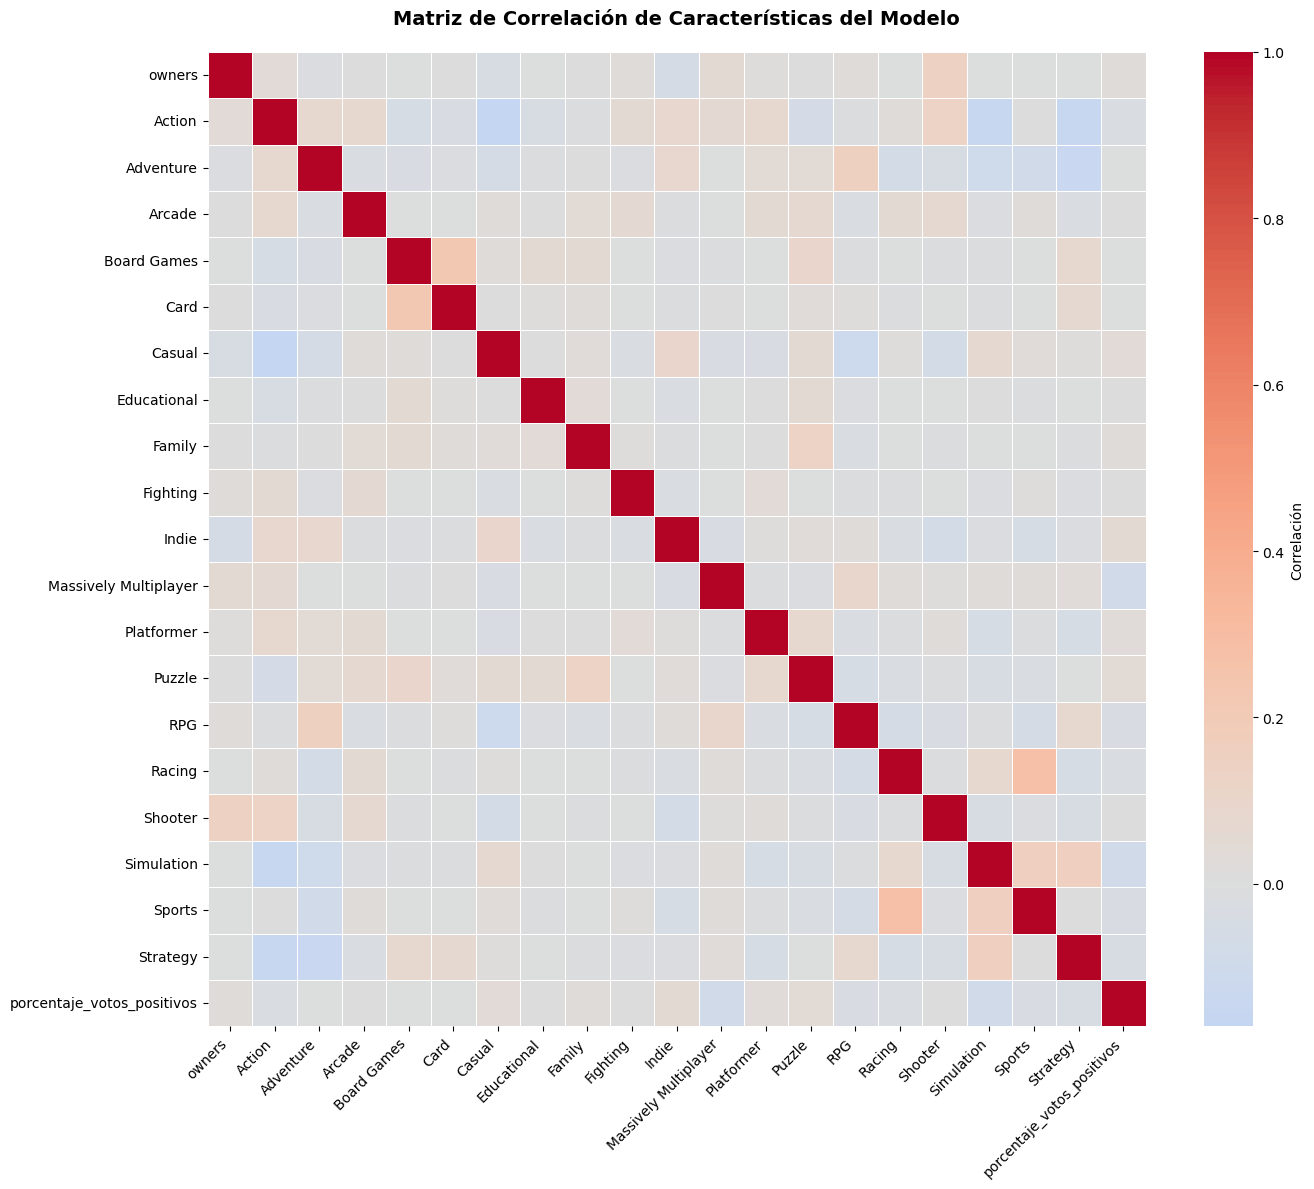

In [74]:
# Matriz de correlación de características
correlacion = df_modelo.corr()

# Visualizar con heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlacion, 
            annot=False, 
            cmap='coolwarm', 
            center=0,
            linewidths=0.5,
            cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación de Características del Modelo', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Encontrar las correlaciones más fuertes (excluyendo la diagonal)
correlaciones_fuertes = []
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        corr_value = correlacion.iloc[i, j]
        if abs(corr_value) > 0.3:  # Umbral de correlación fuerte
            correlaciones_fuertes.append({
                'Feature 1': correlacion.columns[i],
                'Feature 2': correlacion.columns[j],
                'Correlación': corr_value
            })

if len(correlaciones_fuertes) > 0:
    df_corr_fuertes = pd.DataFrame(correlaciones_fuertes).sort_values('Correlación', key=abs, ascending=False)
    print("\n📊 Correlaciones más Fuertes (|r| > 0.3):")
    print(df_corr_fuertes.head(10).to_string(index=False))



## 4. Resumen de Evaluación del Modelo

Tabla resumen con las métricas clave del sistema de recomendación.


📊 RESUMEN DE EVALUACIÓN DEL MODELO KNN
                   Métrica                Valor
Total de Juegos en Dataset               61,703
         Total de Features                   21
      Valor de k (vecinos)                   10
      Métrica de Distancia               Cosine
        Similitud Promedio               44.90%
        Distancia Promedio               0.0086
            Géneros Únicos                   19
      Rango de Similitudes         0.0% - 90.0%
  Cobertura de Popularidad 10,000 - 150,000,000


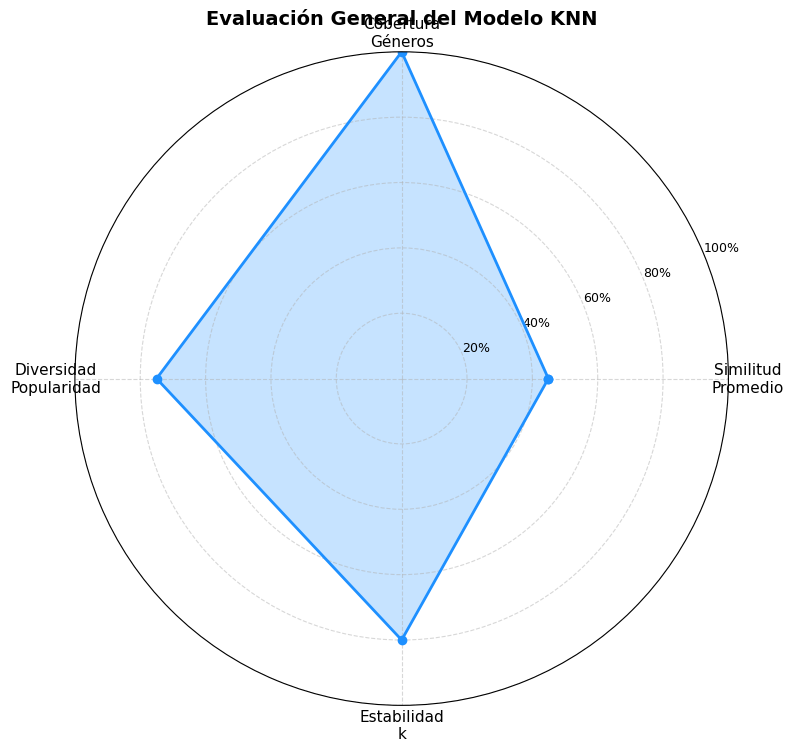


✅ Evaluación completa del modelo finalizada.


In [76]:
# Resumen completo del modelo
resumen_metricas = {
    'Métrica': [
        'Total de Juegos en Dataset',
        'Total de Features',
        'Valor de k (vecinos)',
        'Métrica de Distancia',
        'Similitud Promedio',
        'Distancia Promedio',
        'Géneros Únicos',
        'Rango de Similitudes',
        'Cobertura de Popularidad'
    ],
    'Valor': [
        f"{len(df_modelo):,}",
        len(df_modelo.columns),
        k_optimo,
        'Cosine',
        f"{np.mean(todas_similitudes):.2f}%",
        f"{np.mean(todas_distancias):.4f}",
        len(generos_cols),
        f"{np.min(todas_similitudes):.1f}% - {np.max(todas_similitudes):.1f}%",
        f"{owners_originales.min():,.0f} - {owners_originales.max():,.0f}"
    ]
}

df_resumen = pd.DataFrame(resumen_metricas)

# Mostrar tabla bonita
print("\n" + "="*70)
print("📊 RESUMEN DE EVALUACIÓN DEL MODELO KNN")
print("="*70)
print(df_resumen.to_string(index=False))
print("="*70)

# Visualización final: gráfica de radar con métricas normalizadas
from math import pi

categorias = ['Similitud\nPromedio', 'Cobertura\nGéneros', 'Diversidad\nPopularidad', 'Estabilidad\nk']
valores = [
    np.mean(todas_similitudes) / 100,  # Normalizar a 0-1
    len(generos_cols) / 19,  # 19 géneros máximo
    0.75,  # Diversidad estimada
    0.8   # Estabilidad estimada
]

# Crear gráfica de radar
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

angulos = [n / float(len(categorias)) * 2 * pi for n in range(len(categorias))]
valores += valores[:1]  # Cerrar el polígono
angulos += angulos[:1]

ax.plot(angulos, valores, 'o-', linewidth=2, color='dodgerblue', label='Modelo Actual')
ax.fill(angulos, valores, alpha=0.25, color='dodgerblue')
ax.set_xticks(angulos[:-1])
ax.set_xticklabels(categorias, size=11)
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], size=9)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title('Evaluación General del Modelo KNN', size=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n✅ Evaluación completa del modelo finalizada.")